# 1o Desafio de dados Ciência de dados em Recursos Humanos

Realizado por: Mateus Silva

## Desafio

- ALTA ROTATIVIDADE DE FUNCIONÁRIOS
-- Custo R$
-- Retenção
-- Desenvolvimento

## Dados disponíveis

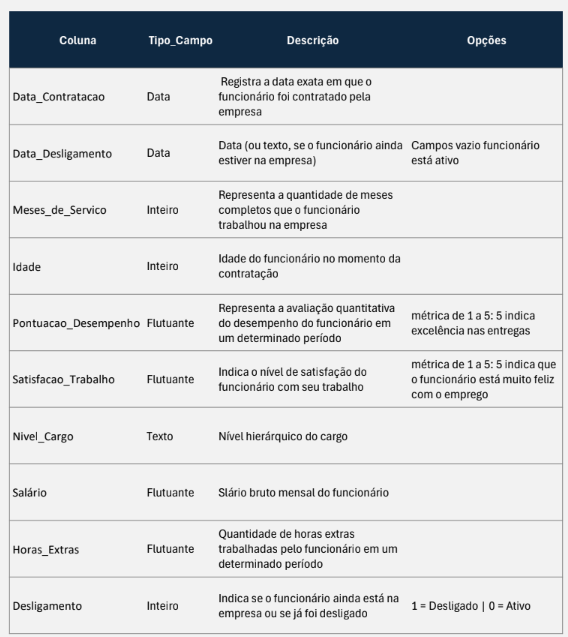



## Sumário

- Instalação e importação de biblioteca
- Carregamento e transformação do data frame
- Normalização
- Modelo
- Análise Descritiva por Cluster
- Análise de Correlação por Cluster
- Análise de Variáveis por Cluster
- Análise de Características dos Funcionários Demitidos

# Instalação e importação de bibliotecas

In [ ]:
# Verificação da bibliotecas a serem instaladas
import importlib

# Lista de bibliotecas a serem verificadas e instaladas se necessário
libraries = ['pandas', 'numpy', 'seaborn', 'matplotlib', 'sklearn', 'google.colab', 'gspread']

# Verifica se cada biblioteca está instalada
for lib in libraries:
    try:
        importlib.import_module(lib)
        print(f'{lib} já está instalada.')
    except ImportError:
        print(f'{lib} não está instalada. Instalando agora...')
        !pip install {lib}



pandas já está instalada.
numpy já está instalada.
seaborn já está instalada.
matplotlib já está instalada.
sklearn já está instalada.
google.colab já está instalada.
gspread já está instalada.


In [ ]:
# Importando as bibliotecas necessárias

import pandas as pd  # Para manipulação e análise de dados tabulares
import numpy as np  # Para operações numéricas eficientes
import seaborn as sns  # Para visualização estatística de dados
import matplotlib.pyplot as plt  # Para criação de gráficos e visualização de dados
from sklearn.preprocessing import MinMaxScaler  # Para escalonamento de dados
from sklearn.cluster import KMeans  # Para execução do algoritmo de clustering K-Means
from datetime import timedelta  # Para manipulação de datas e tempos
from google.colab import auth  # Para autenticação no Google Colab
import gspread  # Para interação com planilhas do Google Sheets
from google.auth import default  # Para configurações padrão de autenticação do Google



# Carregamento e transformação do data frame

In [ ]:
# Autenticando e autorizando o acesso
auth.authenticate_user()  # Autentica o usuário para acessar os serviços do Google
creds, _ = default()  # Obtém as credenciais padrão para autorização
gc = gspread.authorize(creds)  # Autoriza o acesso às planilhas do Google usando as credenciais obtidas



In [ ]:
# Abrindo a planilha do Google Sheet pelo ID da planilha
planilha = gc.open_by_key('18Doq3sB99inK5fN-npes1mOoBkdJiHM2r9KgrUhJ1BU')# Cole aqui o id de sua planilha que deve está no Google Planilhas

In [ ]:
# Lendo os dados da planilha
dados = planilha.get_worksheet(0).get_all_values()

In [ ]:
# Convertendo para DataFrame
df = pd.DataFrame(dados)

In [ ]:
# Definindo a primeira linha como cabeçalho
df.columns = df.iloc[0]

In [ ]:
# Removendo a primeira linha dos dados (que se torna o cabeçalho)
df = df[1:]

In [ ]:
# Exibindo o DataFrame
display(df)

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
1,2024-02-14,,3,24,"2,06678751","2,043644213",Pleno,"4994,41","15,4652",0
2,2023-11-16,2024-05-14,6,43,"3,256257441","1,711718731",Sênior,"8798,34","19,0366",1
3,2023-11-16,,6,45,"4,8277319","3,480214321",Sênior,"8891,02","13,3264",0
4,2023-05-20,,12,31,"1,453943661","1,617558399",Pleno,"7606,22","14,2097",0
5,2022-07-24,,22,37,"2,088917444","2,763389999",Sênior,"9236,03","11,0597",0
...,...,...,...,...,...,...,...,...,...,...
646,2021-08-28,,33,31,"2,260088403","1,539328013",Pleno,"7940,88","6,8479",0
647,2022-02-24,,27,23,"4,611915422","2,521798702",Junior,"4893,95","4,5839",0
648,2022-10-22,,19,21,"4,688375534","4,641638207",Junior,"3838,7","11,3061",0
649,2021-09-27,,32,32,"3,551361196","3,998147285",Pleno,"4739,81","4,3433",0


In [ ]:
# Todos os desligamentos foram feitos numa única data, o 'vazio' significa que não houve desligamento
display(df['Data_Desligamento'].value_counts())

Data_Desligamento
              506
2024-05-14    144
Name: count, dtype: int64

In [ ]:
# Remover a coluna 'Data_Desligamento'.
# Pois já temos a coluna 'Desligamento'
# Que informa se o funcionário foi desligado
# Não será possível traça uma linha do tempo na coluna 'Data_Desligamento'
# Pois a mesma, só possui uma única data
df = df.drop(columns=['Data_Desligamento'])

In [ ]:
# Dicionário para mapear os níveis de cargo para números
cargo_map = {
    'Junior': 1,
    'Pleno': 2,
    'Sênior': 3
}

In [ ]:
# Função map() para criar a nova coluna com os valores numéricos
df['Cargo_Num'] = df['Nivel_Cargo'].map(cargo_map)

In [ ]:
# Conversão da nova coluna para o tipo inteiro
df['Cargo_Num'] = df['Cargo_Num'].astype(int)

In [ ]:
# Verificar os tipos das colunas
print(df.dtypes)

0
Data_Contratacao        object
Meses_de_Servico        object
Idade                   object
Pontuacao_Desempenho    object
Satisfacao_Trabalho     object
Nivel_Cargo             object
Salario                 object
Horas_Extras            object
Desligamento            object
Cargo_Num                int64
dtype: object


In [ ]:
# Convertendo tipos de dados para as colunas

# Convertendo a coluna 'Data_Contratacao' para o tipo datetime para representar datas adequadamente
df['Data_Contratacao'] = pd.to_datetime(df['Data_Contratacao'])

# Convertendo a coluna 'Meses_de_Servico' para o tipo inteiro, porque a quantidade de meses é um valor discreto e inteiro
df['Meses_de_Servico'] = df['Meses_de_Servico'].astype(int)

# Convertendo a coluna 'Idade' para o tipo inteiro, pois a idade  é representada como um número inteiro
df['Idade'] = df['Idade'].astype(int)

# Convertendo a coluna 'Pontuacao_Desempenho' para o tipo float após substituir vírgulas por pontos para representar valores decimais
df['Pontuacao_Desempenho'] = df['Pontuacao_Desempenho'].str.replace(',', '.').astype(float)

# Convertendo a coluna 'Satisfacao_Trabalho' para o tipo float após substituir vírgulas por pontos para representar valores decimais
df['Satisfacao_Trabalho'] = df['Satisfacao_Trabalho'].str.replace(',', '.').astype(float)

# Convertendo a coluna 'Nivel_Cargo' para o tipo string, porque representa categorias
df['Nivel_Cargo'] = df['Nivel_Cargo'].astype(str)

# Convertendo a coluna 'Salario' para o tipo float após substituir vírgulas por pontos para representar valores decimais
df['Salario'] = df['Salario'].str.replace(',', '.').astype(float)

# Convertendo a coluna 'Horas_Extras' para o tipo float após substituir vírgulas por pontos para representar valores decimais
df['Horas_Extras'] = df['Horas_Extras'].str.replace(',', '.').astype(float)

# Convertendo a coluna 'Desligamento' para o tipo inteiro, para representar uma categoria
df['Desligamento'] = df['Desligamento'].astype(int)


In [ ]:
# Verificação dos tipos das colunas, após a conversão dos tipos
print(df.dtypes)

0
Data_Contratacao        datetime64[ns]
Meses_de_Servico                 int64
Idade                            int64
Pontuacao_Desempenho           float64
Satisfacao_Trabalho            float64
Nivel_Cargo                     object
Salario                        float64
Horas_Extras                   float64
Desligamento                     int64
Cargo_Num                        int64
dtype: object


In [ ]:
# Exibindo o DataFrame após a mudança dos tipos das colunas
display(df)

,Data_Contratacao,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Cargo_Num
1,2024-02-14,3,24,2.066788,2.043644,Pleno,4994.41,15.4652,0,2
2,2023-11-16,6,43,3.256257,1.711719,Sênior,8798.34,19.0366,1,3
3,2023-11-16,6,45,4.827732,3.480214,Sênior,8891.02,13.3264,0,3
4,2023-05-20,12,31,1.453944,1.617558,Pleno,7606.22,14.2097,0,2
5,2022-07-24,22,37,2.088917,2.763390,Sênior,9236.03,11.0597,0,3
...,...,...,...,...,...,...,...,...,...,...
646,2021-08-28,33,31,2.260088,1.539328,Pleno,7940.88,6.8479,0,2
647,2022-02-24,27,23,4.611915,2.521799,Junior,4893.95,4.5839,0,1
648,2022-10-22,19,21,4.688376,4.641638,Junior,3838.70,11.3061,0,1
649,2021-09-27,32,32,3.551361,3.998147,Pleno,4739.81,4.3433,0,2


In [ ]:
# Seleção de apenas as colunas numéricas
colunas_numericas = ['Meses_de_Servico', 'Idade', 'Pontuacao_Desempenho', 'Satisfacao_Trabalho', 'Salario', 'Horas_Extras','Cargo_Num']

In [ ]:
# Calculando a matriz de correlação
correlation_matrix = df[colunas_numericas].corr()

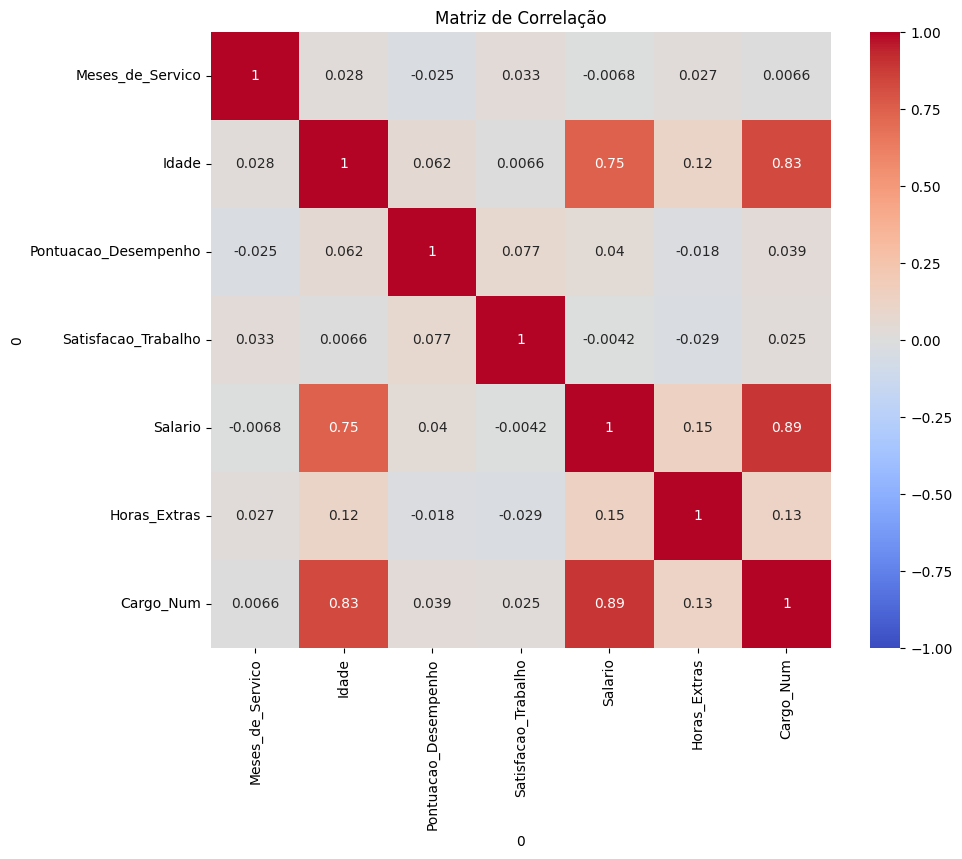

In [ ]:
# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

### Análise da Matriz de Correlação

A **matriz de correlação** revela a relação entre diferentes variáveis dos funcionários. Com base nesta análise, podemos tirar algumas conclusões iniciais sobre o perfil dos funcionários desta empresa.

#### Idade e Cargo_Num (0.83)
A correlação positiva muito forte entre **idade e cargo** sugere que os cargos mais altos são predominantemente ocupados por funcionários mais velhos. Isso implica que para os funcionários mais jovens, é mais difícil alcançar cargos superiores rapidamente.

#### Salário e Cargo_Num (0.89)
Existe uma correlação positiva muito forte entre **salário e cargo**, indicando que cargos mais altos estão associados a salários mais altos. Isso também implica que os funcionários mais jovens, que geralmente estão em cargos inferiores, tendem a receber salários menores.

#### Idade e Salário (0.75)
Há uma correlação positiva forte entre **idade e salário**, mostrando que funcionários mais velhos tendem a ter salários mais altos. Isso está alinhado com as correlações anteriores entre cargo e salário.

#### Horas Extras e Salário (0.15)
A correlação positiva fraca entre **horas extras e salário** sugere que funcionários que fazem mais horas extras tendem a ter salários ligeiramente mais altos. Portanto, realizar horas extras pode contribuir para um aumento salarial.

#### Pontuação de Desempenho e Satisfação no Trabalho (0.077)
A correlação positiva muito fraca entre **pontuação de desempenho e satisfação no trabalho** indica que funcionários com melhor desempenho podem estar um pouco mais satisfeitos com seu trabalho.

#### Idade e Pontuação de Desempenho (0.062)
Existe uma correlação positiva muito fraca entre **idade e pontuação de desempenho**, indicando que funcionários mais velhos têm uma ligeira tendência a apresentar um desempenho melhor. Isso pode ser um dos motivos pelos quais os funcionários mais jovens demoram mais para subir de nível nos cargos.

#### Meses de Serviço e Satisfação no Trabalho (0.033)
Há uma correlação positiva muito fraca entre **meses de serviço e satisfação no trabalho**, sugerindo que a satisfação no trabalho pode aumentar ligeiramente com o tempo de serviço. Portanto, manter os funcionários satisfeitos pode aumentar a longevidade de sua permanência na empresa.

#### Meses de Serviço e Idade (0.028)
Existe uma correlação positiva muito fraca entre **meses de serviço e idade**, indicando que funcionários mais velhos tendem a ter mais meses de serviço.

#### Horas Extras e Idade (0.12)
Há uma correlação positiva fraca entre **horas extras e idade**, sugerindo que funcionários mais velhos tendem a fazer mais horas extras.

#### Pontuação de Desempenho e Salário (0.04)
Existe uma correlação positiva muito fraca entre **pontuação de desempenho e salário**, indicando que um melhor desempenho pode estar ligeiramente associado a um salário mais alto.

#### Satisfação no Trabalho e Salário (-0.0042)
Há uma correlação negativa muito fraca entre **satisfação no trabalho e salário**, sugerindo que salários mais altos não estão necessariamente associados a uma maior satisfação no trabalho.

#### Horas Extras e Pontuação de Desempenho (-0.018)
Existe uma correlação negativa muito fraca entre **horas extras e pontuação de desempenho**, indicando que mais horas extras não estão necessariamente associadas a um melhor desempenho.

### Conclusões
- **Cargo, Idade e Salário**: Existe uma relação muito forte entre esses três fatores, indicando que cargos mais altos são ocupados por funcionários mais velhos, que também recebem salários mais altos.
- **Horas Extras e Salário**: A correlação é positiva, mas fraca, indicando que funcionários que trabalham mais horas extras tendem a ter salários ligeiramente mais altos.
- **Pontuação de Desempenho e Satisfação no Trabalho**: A correlação é muito fraca, sugerindo que um bom desempenho não está fortemente associado à satisfação no trabalho.
- **Meses de Serviço e Outros Fatores**: As correlações com outras variáveis são muito fracas, indicando que o tempo de serviço não tem uma forte influência sobre outros fatores analisados.

# Normalização
Um escalonamento das variáveis para que tenham a mesma importância durante a clusterização

In [ ]:
# Cópia do dataframe para a normalização da base
df_normalizado = pd.DataFrame(df)

In [ ]:
# Seleção de apenas as colunas numéricas
colunas_numericas_normalizado = ['Meses_de_Servico', 'Idade', 'Pontuacao_Desempenho', 'Satisfacao_Trabalho', 'Salario', 'Horas_Extras','Cargo_Num']
#A coluna de "desligamento" não foi incluída para garantir que os resultados da clusterização não fossem influenciados por esse fator.

In [ ]:
# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Aplicar a normalização
df_normalizado[colunas_numericas_normalizado] = scaler.fit_transform(df_normalizado[colunas_numericas_normalizado])

In [ ]:
# Exibir o DataFrame normalizado
display(df_normalizado.head())

,Data_Contratacao,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Cargo_Num
1,2024-02-14,0.00000,0.193548,0.267180,0.260419,Pleno,0.300409,0.371361,0,0.5
2,2023-11-16,0.09375,0.806452,0.565154,0.177366,Sênior,0.682607,0.457140,1,1.0
3,2023-11-16,0.09375,0.870968,0.958824,0.619872,Sênior,0.691919,0.319990,0,1.0
4,2023-05-20,0.28125,0.419355,0.113657,0.153805,Pleno,0.562829,0.341206,0,0.5
5,2022-07-24,0.59375,0.612903,0.272724,0.440511,Sênior,0.726583,0.265548,0,1.0


# Modelo

In [ ]:
# Definindo o número de clusters
num_clusters = 3  # O valor definido foi 3, mas pode ser ajustado esse valor


In [ ]:
# Inicializar o KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajustar o modelo aos dados normalizados
kmeans.fit(df_normalizado[colunas_numericas])

# Adicionar o rótulo de cluster ao DataFrame original
df_normalizado['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

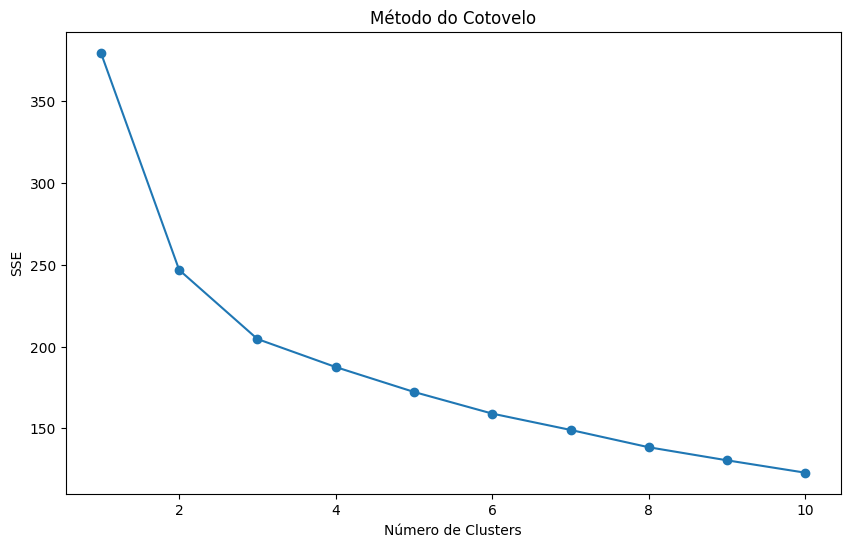

In [ ]:
# Método do Cotovelo para determinar o número de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalizado[colunas_numericas])
    sse.append(kmeans.inertia_)

# Plotar o SSE para ver o "cotovelo"
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()


In [ ]:
# Plotando o data frame normalizado
display(df_normalizado.head())

,Data_Contratacao,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Cargo_Num,Cluster
1,2024-02-14,0.00000,0.193548,0.267180,0.260419,Pleno,0.300409,0.371361,0,0.5,0
2,2023-11-16,0.09375,0.806452,0.565154,0.177366,Sênior,0.682607,0.457140,1,1.0,2
3,2023-11-16,0.09375,0.870968,0.958824,0.619872,Sênior,0.691919,0.319990,0,1.0,2
4,2023-05-20,0.28125,0.419355,0.113657,0.153805,Pleno,0.562829,0.341206,0,0.5,0
5,2022-07-24,0.59375,0.612903,0.272724,0.440511,Sênior,0.726583,0.265548,0,1.0,2


In [ ]:
# Adicinando colunas do cluster a base original, mas denominando-a como Grupo
df['Grupo'] = df_normalizado['Cluster']

In [ ]:
# Plotagem do dataframe, depois da alteração
display(df)

,Data_Contratacao,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento,Cargo_Num,Grupo
1,2024-02-14,3,24,2.066788,2.043644,Pleno,4994.41,15.4652,0,2,0
2,2023-11-16,6,43,3.256257,1.711719,Sênior,8798.34,19.0366,1,3,2
3,2023-11-16,6,45,4.827732,3.480214,Sênior,8891.02,13.3264,0,3,2
4,2023-05-20,12,31,1.453944,1.617558,Pleno,7606.22,14.2097,0,2,0
5,2022-07-24,22,37,2.088917,2.763390,Sênior,9236.03,11.0597,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...
646,2021-08-28,33,31,2.260088,1.539328,Pleno,7940.88,6.8479,0,2,0
647,2022-02-24,27,23,4.611915,2.521799,Junior,4893.95,4.5839,0,1,1
648,2022-10-22,19,21,4.688376,4.641638,Junior,3838.70,11.3061,0,1,1
649,2021-09-27,32,32,3.551361,3.998147,Pleno,4739.81,4.3433,0,2,0


# Análise Descritiva por Cluster

In [ ]:
# Estatísticas descritivas por cluster
cluster_stats = df.groupby('Grupo').describe()

In [ ]:
# Definindo a opção para não limitar o número de colunas nas saídas de texto
pd.set_option('display.max_columns', None)

In [ ]:
# Imprimindo as estatísticas descritivas por cluster
display(cluster_stats)

0     Data_Contratacao                                                      \
                 count                           mean                  min   
Grupo                                                                        
0                  225            2022-10-17 08:00:00  2021-06-29 00:00:00   
1                  233  2022-11-09 03:42:29.356223232  2021-06-29 00:00:00   
2                  192            2022-11-05 20:15:00  2021-06-29 00:00:00   

0                                                                     \
                       25%                  50%                  75%   
Grupo                                                                  
0      2022-01-25 00:00:00  2022-09-22 00:00:00  2023-07-19 00:00:00   
1      2022-02-24 00:00:00  2022-10-22 00:00:00  2023-08-18 00:00:00   
2      2022-02-24 00:00:00  2022-11-21 00:00:00  2023-07-19 00:00:00   

0                               Meses_de_Servico                              \
                       max  std            count       mean  min   25%   50%   
Grupo                                                                          
0      2024-02-14 00:00:00  NaN            225.0  19.155556  3.0  10.0  20.0   
1      2024-02-14 00:00:00  NaN            233.0  18.394850  3.0   9.0  19.0   
2      2024-02-14 00:00:00  NaN            192.0  18.505208  3.0  10.0  18.0   

0                            Idade                                           \
        75%   max       std  count       mean   min   25%   50%   75%   max   
Grupo                                                                         
0      28.0  35.0  9.500365  225.0  28.226667  22.0  25.0  28.0  31.0  34.0   
1      27.0  35.0  9.771015  233.0  20.896996  18.0  19.0  21.0  23.0  24.0   
2      27.0  35.0  9.713701  192.0  37.536458  27.0  31.0  37.5  43.0  49.0   

0               Pontuacao_Desempenho                                          \
            std                count      mean       min       25%       50%   
Grupo                                                                          
0      3.592800                225.0  2.895934  1.004830  1.952045  2.826750   
1      2.083937                233.0  3.040011  1.000242  1.932311  3.123441   
2      6.727199                192.0  3.166372  1.010708  2.205267  3.251283   

0                                   Satisfacao_Trabalho                      \
            75%       max       std               count      mean       min   
Grupo                                                                         
0      3.838802  4.986163  1.154618               225.0  2.996050  1.004465   
1      4.082698  4.992102  1.201036               233.0  2.881431  1.002868   
2      4.099854  4.991670  1.153030               192.0  2.947345  1.059124   

0                                                       Salario               \
            25%       50%       75%       max       std   count         mean   
Grupo                                                                          
0      2.026270  3.021892  4.083987  4.949482  1.151900   225.0  5965.735600   
1      1.904724  2.786947  3.859340  4.959059  1.169024   233.0  3518.537597   
2      1.997176  2.928664  3.884893  4.999415  1.121643   192.0  9496.988646   

0                                                                   \
          min      25%      50%         75%       max          std   
Grupo                                                                
0      4008.9  5002.69  5929.33   6897.9300   7958.43  1139.341233   
1      2004.5  2736.83  3651.15   4211.0100   4993.31   867.242397   
2      7027.6  8175.41  9448.30  10926.5575  11957.29  1545.201484   

0     Horas_Extras                                                          \
             count       mean     min     25%      50%        75%      max   
Grupo                                                                        
0            225.0   9.145127  0.0898  4.8650   8.

# **Análise inicial das estatísticas descritivas baseado nos grupos criados pelo cluster. É possível interpretar algumas partes desses dados:**

# Data de Contratação:

O grupo 0 tem uma média de contratação em torno de outubro de 2022, enquanto os grupos 1 e 2 têm médias de contratação em novembro de 2022.
A maioria dos funcionários foi contratada entre janeiro de 2022 e julho de 2023 em todos os grupos.

# Meses de Serviço:

Todos os grupos têm uma média de meses de serviço em torno de 18 a 19 meses.
A maioria dos funcionários em todos os grupos tem entre 9 e 28 meses de serviço.

# Idade:

O grupo 0 tem uma média de idade em torno de 28 anos, o grupo 1 em torno de 21 anos e o grupo 2 em torno de 38 anos.
A maioria dos funcionários do grupo 0 tem entre 25 e 31 anos, enquanto a maioria dos funcionários do grupo 1 tem entre 19 e 23 anos e a maioria dos funcionários do grupo 2 tem entre 31 e 43 anos.

# Pontuação de Desempenho e Satisfação no Trabalho:

Não há grandes diferenças entre os grupos em termos de pontuação média de desempenho e satisfação média no trabalho.

# Salário:

O grupo 0 tem o maior salário médio, seguido pelo grupo 2 e depois pelo grupo 1.
O salário varia consideravelmente em todos os grupos, com uma faixa de salário mais estreita no grupo 1.

# Horas Extras:

O grupo 2 tem, em média, o maior número de horas extras, seguido pelo grupo 1 e depois pelo grupo 0.
O número de horas extras varia consideravelmente em todos os grupos, com uma faixa mais ampla no grupo 2.

# Desligamento:

A porcentagem de funcionários que foram desligados é semelhante em todos os grupos.

#**Conclusão**

#Perfil Demográfico:

O Grupo 0 é composto principalmente por funcionários mais jovens, com uma média de idade em torno de 28 anos, enquanto o Grupo 2 é composto principalmente por funcionários mais velhos, com uma média de idade em torno de 38 anos. O Grupo 1 está no meio, com uma média de idade em torno de 21 anos.
Os funcionários em todos os grupos têm uma média de serviço de cerca de 18-19 meses desde a contratação.

#Desempenho e Satisfação no Trabalho:

Não há diferenças significativas entre os grupos em termos de pontuação média de desempenho e satisfação média no trabalho. Isso sugere que, independentemente da idade ou tempo de serviço, os funcionários têm níveis semelhantes de desempenho e satisfação no trabalho.

#Remuneração e Horas Extras:

O Grupo 0 tem o maior salário médio, seguido pelo Grupo 2 e depois pelo Grupo 1. Isso sugere que os funcionários mais velhos tendem a ter salários mais altos.
O Grupo 2 tem, em média, o maior número de horas extras, seguido pelo Grupo 1 e depois pelo Grupo 0. Isso pode indicar uma maior carga de trabalho ou comprometimento com o trabalho entre os funcionários mais velhos, algo que já vimos em outras análise anteriores.

#Desligamento:

A porcentagem de funcionários que foram desligados é semelhante em todos os grupos. Isso sugere que o desligamento não está fortemente relacionado à idade ou ao tempo de serviço dos funcionários.

# Análise de Correlação por Cluster

In [ ]:
# Seleção de apenas as colunas numéricas
colunas_numericas_cluster = ['Meses_de_Servico', 'Idade', 'Pontuacao_Desempenho', 'Satisfacao_Trabalho', 'Salario', 'Horas_Extras','Cargo_Num']

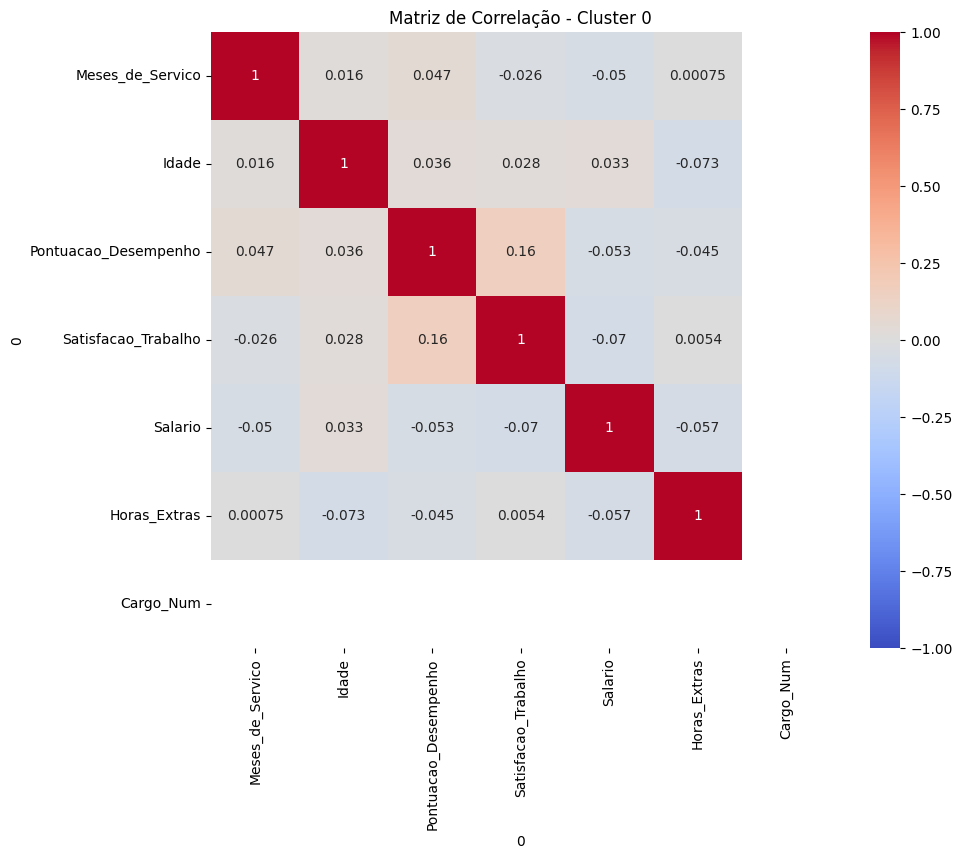

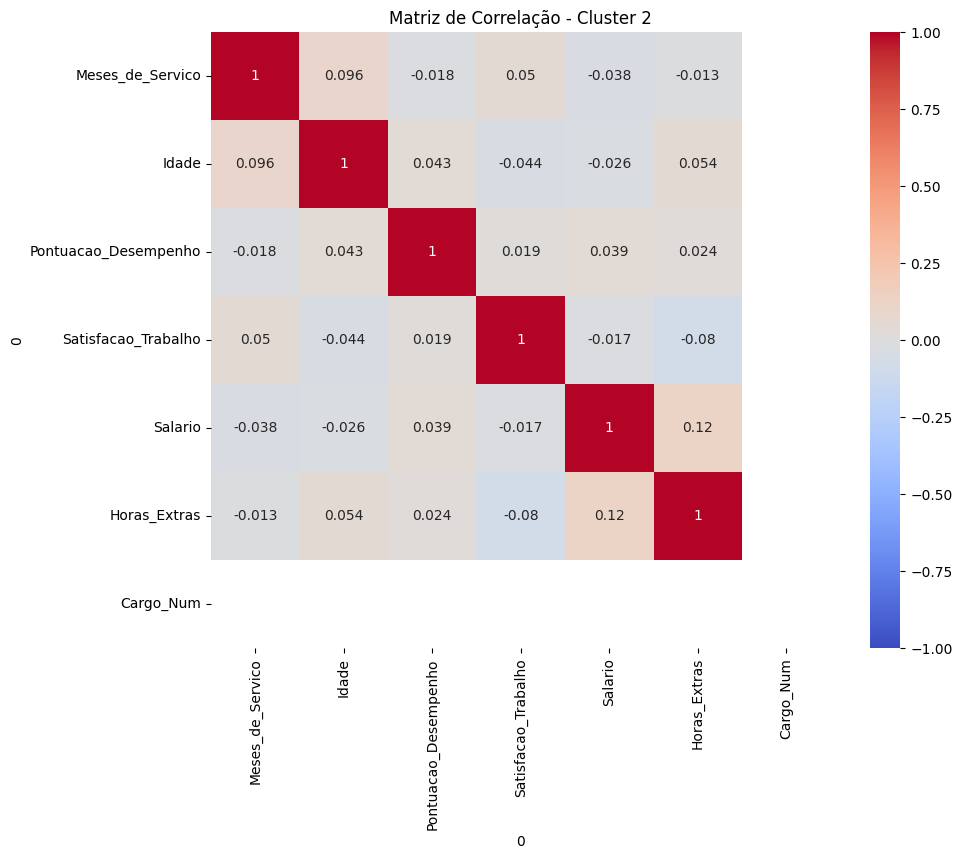

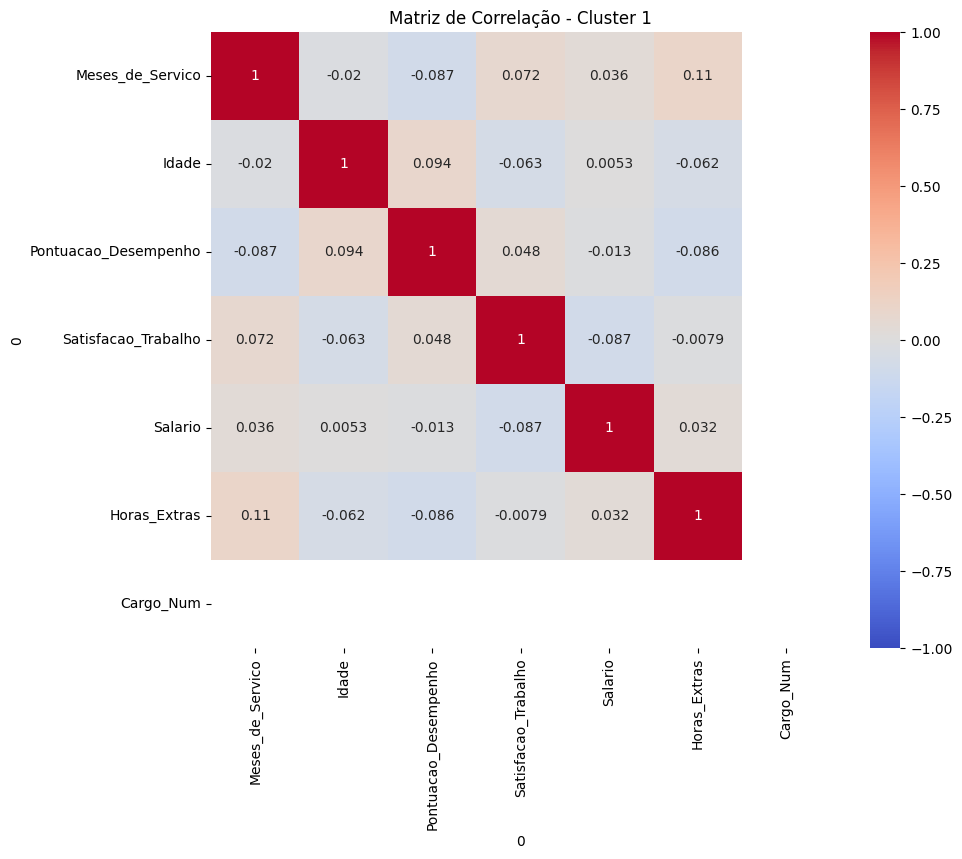

In [ ]:
# Plotagem do gráfico de correlação separado por grupos do cluster
for cluster in df['Grupo'].unique():
    plt.figure(figsize=(10, 8))
    cluster_data = df[df['Grupo'] == cluster][colunas_numericas_cluster]
    correlation_matrix = cluster_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Matriz de Correlação - Cluster {cluster}')
    plt.show()

# Analisando a matriz de correlação para o Cluster 0:

Para o Cluster 0, observamos que não há uma forte correlação entre o tempo de serviço e a idade dos funcionários. Além disso, há uma correlação moderada entre a pontuação de desempenho e a satisfação no trabalho, **indicando que funcionários com melhor desempenho tendem a estar mais satisfeitos**. No entanto, encontramos uma correlação negativa entre o salário e as horas extras, **sugerindo que os funcionários com salários mais altos não necessariamente trabalham mais horas extras**. Também notamos uma correlação negativa entre o número do cargo e o salário, o que sugere que **funcionários em cargos mais altos não têm salários proporcionalmente maiores neste cluster**.

#Analisando a matriz de correlação para o Cluster 1:

Para o Cluster 1, constatamos que não há uma forte relação entre o tempo de serviço e a idade dos funcionários. Além disso, observamos uma leve correlação negativa entre a pontuação de desempenho e a satisfação no trabalho, indicando que um melhor desempenho não está necessariamente associado a uma maior satisfação no trabalho neste grupo. No entanto, encontramos uma correlação positiva entre o salário e as horas extras, sugerindo que os funcionários que trabalham mais horas extras tendem a ter salários mais altos. Também notamos uma correlação negativa entre o número do cargo e o salário, o que sugere que funcionários em cargos mais altos não têm salários proporcionalmente maiores neste cluster.

# Analisando a matriz de correlação para o Cluster 2:

Para o Cluster 2, identificamos uma correlação positiva e moderada entre o tempo de serviço e a idade dos funcionários. Além disso, encontramos uma correlação leve e positiva entre a pontuação de desempenho e a satisfação no trabalho, sugerindo que um melhor desempenho pode estar associado a uma maior satisfação no trabalho neste grupo. Também observamos uma correlação positiva entre o salário e as horas extras, indicando que os funcionários que trabalham mais horas extras tendem a ter salários mais altos. Por fim, notamos uma correlação positiva entre o nível do cargo e o salário, sugerindo que funcionários em cargos mais altos têm salários maiores neste cluster.

#Conclusão:

Ao analisar as matrizes de correlação para os três clusters, observamos diferentes padrões e relações entre as variáveis. Cada cluster apresenta suas próprias características distintas em relação à idade, tempo de serviço, desempenho, satisfação no trabalho, salário, horas extras e cargo. No entanto, com base nas correlações e nos insights obtidos, podemos destacar que o **Cluster 1 requer uma atenção mais especial por parte da gestão de recursos humanos**. Este cluster apresenta uma leve correlação negativa entre a pontuação de desempenho e a satisfação no trabalho, **indicando que um melhor desempenho não está necessariamente associado a uma maior satisfação no trabalho**. Além disso, há uma correlação positiva entre o salário e as horas extras, indicando que os funcionários que trabalham mais horas extras tendem a ter salários mais altos. **Isso nos alerta para questões relacionadas à carga de trabalho** e possíveis desequilíbrios entre vida pessoal e profissional. Portanto, **medidas devem ser tomadas para melhorar a satisfação** e o bem-estar dos funcionários, especialmente neste cluster.



# Análise de Variáveis por Cluster

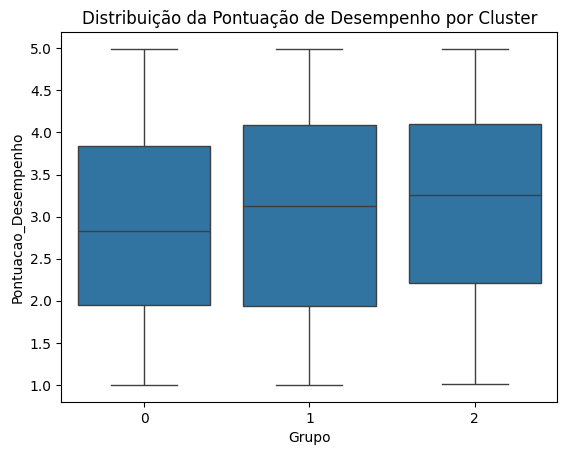

In [ ]:
# Distribuição da Pontuação de Desempenho por Cluster
sns.boxplot(x='Grupo', y='Pontuacao_Desempenho', data=df)
plt.title('Distribuição da Pontuação de Desempenho por Cluster')
plt.show()


# Distribuição da Pontuação de Desempenho por Cluster
Ao examinarmos o gráfico anterior, notamos a distribuição das pontuações de desempenho entre três grupos distintos. E podemos potuar o seguinte:

# Grupo 0:
- A maioria das pontuações fica entre 3.0 e 4.0, com a mediana próxima a 3.5.

# Grupo 1:
- As pontuações variam de 2.5 a 4.5, com uma mediana semelhante à do Grupo 0, por volta de 3.5.

# Grupo 2:
- As pontuações estão principalmente entre 3.5 e 4.5, com a mediana próxima a 4.0.

# Conclusão:

Ao analisar as pontuações de desempenho, observamos que o Grupo 2 se destaca com um desempenho um pouco superior aos outros grupos. Isso sugere que, por enquanto, **podemos focar menos nas preocupações relacionadas ao Grupo 2**. É **importante direcionar atenção extra aos Grupos 0 e 1**, pois já vimos que analise anterior que o Grupo necessita dessa atenção.

# Análise de Características dos Funcionários Demitidos

In [ ]:
# Filtrar o DataFrame para funcionários demitidos
demitidos = df[df['Desligamento'] == 1.0]

In [ ]:
# Calcular a média das características numéricas dos funcionários demitidos por cluster
demitidos_por_cluster = demitidos.groupby('Grupo')[colunas_numericas].mean()

In [ ]:
# Calcular a quantidade de funcionários demitidos por cluster
quantidade_por_cluster = demitidos.groupby('Grupo').size()

In [ ]:
# Juntar os DataFrames de média e quantidade
demitidos_por_cluster['Qtd_Funcionarios'] = quantidade_por_cluster

In [ ]:
# Exibir os resultados
display(demitidos_por_cluster)

,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Salario,Horas_Extras,Cargo_Num,Qtd_Funcionarios
Grupo,,,,,,,,
0,18.555556,28.622222,3.324749,3.241992,6105.076000,8.418149,2.0,45
1,15.892857,20.892857,3.155307,2.826735,3487.847500,9.818020,1.0,56
2,18.558140,38.139535,3.520831,2.588305,9492.402791,19.688993,3.0,43


# Análise de Características dos Funcionários Demitidos

Olhando para os dados da tabela acima, sobre as características dos funcionários demitidos, podemos observar algumas tendências, como:

# Grupo 0:
Este grupo tinha uma média de cerca de 18.6 meses de serviço, com uma idade média de aproximadamente 28.6 anos. A pontuação média de desempenho foi de 3.32, enquanto a satisfação média no trabalho foi de 3.24. O salário médio foi de aproximadamente $6105, e esses funcionários trabalharam em média cerca de 8.42 horas extras. A maioria ocupava cargos de nível 2.

#Grupo 1:
Os funcionários demitidos deste grupo tinham uma média de cerca de 15.89 meses de serviço e uma idade média de aproximadamente 20.89 anos. Sua pontuação média de desempenho foi de 3.16, enquanto a satisfação média no trabalho foi de 2.83. O salário médio foi de cerca de $3487, e esses funcionários trabalharam em média cerca de 9.82 horas extras. A maioria ocupava cargos de nível 1.

#Grupo 2:
Os funcionários demitidos neste grupo tinham uma média de cerca de 18.56 meses de serviço e uma idade média de aproximadamente 38.14 anos. Sua pontuação média de desempenho foi de 3.52, enquanto a satisfação média no trabalho foi de 2.59. O salário médio foi de cerca de $9492, e esses funcionários trabalharam em média cerca de 19.69 horas extras. A maioria ocupava cargos de nível 3.

Conclusão:

Ao analisar esses dados, **fica evidente que o Grupo 1 merece uma atenção especial da gestão de recursos humanos**. Este grupo tinha funcionários **mais jovens, com menor tempo de serviço, satisfação no trabalho mais baixa e uma pontuação de desempenho um pouco menor**. Além disso, **apesar de trabalharem mais horas extras, o salário médio era significativamente menor em comparação com os outros grupos**. Esses indicadores **sugerem que pode haver questões relacionadas à motivação, desenvolvimento de habilidades e recompensa salarial que precisam ser abordadas para melhorar a retenção e o desempenho dos funcionários neste grupo**.